**KELOMPOK 1**
==========================================================================================================================================
**PREDIKSI MEREK PASTA GIGI BERDASARKAN ANALISA KONDISI GIGI DAN PREFERENSI HARGA**
==========================================================================================================================================

ZAHIR SYAHBANI     (41520120009)

FAAZA NAIMA        (41520120010)

LARASATI FEBRIANDA (41520120011)


==========================================================================================================================================
selected_columns = ['kondisi', 'sakit_gigi', 'frekuensi_sakit', 'masalah_gigi', 'gigi_berlubang', 'harga', 'reaksi_negatif', 'range_warna_gigi']

target_variable = 'merek'
==========================================================================================================================================/

## BUSINESS UNDERSTANDING

Surveyor ingin mengetahui faktor-faktor yang mempengaruhi pilihan merek pasta gigi pelanggan, termasuk kondisi dan preferensi mereka. Surveyor juga ingin mengembangkan model untuk memprediksi merek pasta gigi yang akan dipilih pelanggan berdasarkan faktor-faktor tersebut.

## DATA UNDERSTANDING

Mengumpulkan data pelanggan berupa pertanyaan kuisioner
1. Jenis Model Pasta Gigi yang digunakan": "jenis"
2. Merk Pasta Gigi yang Anda gunakan (jika menggunakan)": "merek",
3. Lama Penggunaan Merk Pasta gigi tersebut (sesuai nomor 2)": "lama",
4. Kondisi gigi anda saat ini?": "kondisi",
5. Apakah anda mempunyai riwayat sakit gigi?": "sakit_gigi",
6. Jika jawaban no 5 adalah iya, seberapa sering Anda mengalami sakit gigi?": "frekuensi_sakit",
7.  Pernah mengalami masalah gigi lainnya? (misalnya, gusi berdarah, gigi tanggal, dll.)": "masalah_gigi",
8.  Apakah anda memiliki gigi yang berlubang?": "gigi_berlubang",
9.  Apakah Anda melakukan pemeriksaan gigi rutin setidaknya 6 bulan sekali? ": "pemeriksaan_rutin",
10. Intensitas gosok gigi dalam sehari?": "intensitas_gosok_gigi",
11. Apakah Anda menggunakan teknik yang benar saat menyikat gigi?":"teknik_gosok_gigi",
12. Frekuensi dalam mengganti merk pasta gigi yang anda gunakan": "frekuensi_mengganti",
13.  Apakah anda merokok?": "merokok",
14. Apakah harga mempengaruhi pilihan Anda dalam membeli pasta gigi": "harga",
15. Apakah Anda pernah mengalami reaksi negatif setelah menggunakan pasta gigi tertentu? (misalnya, iritasi gusi, rasa panas, dll.)": "reaksi_negatif",
16. Range warna gigi anda saat ini \ncontoh jawaban: 1": "range_warna_gigi"

## DATA PREPARATION

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [ ]:
# Baca data dari file CSV
#file_path = "C:/Users/rokeu/Downloads/dataset.csv"#
file_path = "/content/kesehatan.csv"
data = pd.read_csv(file_path)

In [ ]:
df = pd.DataFrame(data)
df.rename(columns=
          {"Timestamp": "timestamp",
           "Nama": "nama",
           "Jenis Kelamin": "jk",
           "Usia dalam tahun\nContoh: 25": "usia",
           "1. Jenis Model Pasta Gigi yang digunakan": "jenis",
           "2. Merk Pasta Gigi yang Anda gunakan (jika menggunakan)": "merek",
           "3. Lama Penggunaan Merk Pasta gigi tersebut (sesuai nomor 2)": "lama",
           "4. Kondisi gigi anda saat ini?": "kondisi",
           "5. Apakah anda mempunyai riwayat sakit gigi?": "sakit_gigi",
           "6. Jika jawaban no 5 adalah iya, seberapa sering Anda mengalami sakit gigi?": "frekuensi_sakit",
           "7.  Pernah mengalami masalah gigi lainnya? (misalnya, gusi berdarah, gigi tanggal, dll.)": "masalah_gigi",
           "8.  Apakah anda memiliki gigi yang berlubang?": "gigi_berlubang",
           "9.  Apakah Anda melakukan pemeriksaan gigi rutin setidaknya 6 bulan sekali? ": "pemeriksaan_rutin",
           "10. Intensitas gosok gigi dalam sehari?": "intensitas_gosok_gigi",
           "11. Apakah Anda menggunakan teknik yang benar saat menyikat gigi?":"teknik_gosok_gigi",
           "12. Frekuensi dalam mengganti merk pasta gigi yang anda gunakan": "frekuensi_mengganti",
           "13.  Apakah anda merokok?": "merokok",
           "14. Apakah harga mempengaruhi pilihan Anda dalam membeli pasta gigi": "harga",
           "15. Apakah Anda pernah mengalami reaksi negatif setelah menggunakan pasta gigi tertentu? (misalnya, iritasi gusi, rasa panas, dll.)": "reaksi_negatif",
           "16. Range warna gigi anda saat ini \ncontoh jawaban: 1": "range_warna_gigi"
          }, inplace=True)

df.head()

,timestamp,nama,jk,usia,jenis,merek,lama,kondisi,sakit_gigi,frekuensi_sakit,masalah_gigi,gigi_berlubang,pemeriksaan_rutin,intensitas_gosok_gigi,teknik_gosok_gigi,frekuensi_mengganti,merokok,harga,reaksi_negatif,range_warna_gigi
0,10/14/2023 20:39:38,Muh Jadid Taqwa,Laki-Laki,24,Pasta Gigi,Colgate,> 12 Bulan,Normal,Iya,Tidak pernah,Tidak Pernah,Ya,Ya,>= 3 Kali,Ya,Tidak pernah,Tidak,Ya,Tidak pernah,2
1,10/14/2023 20:44:48,Faaza,Perempuan,24,Pasta Gigi,Pepsodent,1 sd 3 Bulan,Normal,Iya,kadang-kadang,Pernah,Ya,Tidak,2 Kali,Tidak yakin,Tidak pernah,Tidak,Ya,Tidak pernah,4
2,10/14/2023 20:48:50,Dinne elza zakiah,Perempuan,22,Pasta Gigi,Ciptadent,> 12 Bulan,Sensitif,Iya,Jarang,Pernah,Ya,Tidak,>= 3 Kali,Tidak yakin,Sering,Tidak,Tidak,Tidak pernah,6
3,10/14/2023 20:54:07,Baiq Nur'ainna Sultia,Perempuan,24,Pasta Gigi,Pepsodent,> 12 Bulan,Normal,Iya,kadang-kadang,Pernah,Ya,Tidak,1 kali,Tidak yakin,Tidak pernah,Tidak,Tidak,Tidak pernah,5
4,10/14/2023 20:54:09,Alia Rahmadani,Perempuan,31,Pasta Gigi,Pepsodent,> 12 Bulan,Normal,Iya,Jarang,Pernah,Ya,Tidak,2 Kali,Tidak yakin,Kondisional,Tidak,Tidak,Tidak pernah,9


In [ ]:
df.tail(  )

,timestamp,nama,jk,usia,jenis,merek,lama,kondisi,sakit_gigi,frekuensi_sakit,masalah_gigi,gigi_berlubang,pemeriksaan_rutin,intensitas_gosok_gigi,teknik_gosok_gigi,frekuensi_mengganti,merokok,harga,reaksi_negatif,range_warna_gigi
293,11/9/2023 17:40:11,Christopher Marco Angelo,Laki-Laki,21,Pasta Gigi,Pepsodent,> 12 Bulan,Normal,Tidak,Tidak pernah,Pernah,Tidak,Tidak,2 Kali,Ya,Kondisional,Tidak,Ya,Tidak pernah,19
294,11/9/2023 17:46:04,Riska restiani,Perempuan,23,Pasta Gigi,CloseUp,1 sd 3 Bulan,Normal,Tidak,Tidak pernah,Tidak Pernah,Tidak,Tidak,2 Kali,Ya,Sering,Tidak,Tidak,Tidak pernah,5
295,11/9/2023 18:21:43,Winarto,Laki-Laki,24,Pasta Gigi,Pepsodent,> 12 Bulan,Sensitif,Tidak,Tidak pernah,Tidak Pernah,Ya,Tidak,1 kali,Tidak yakin,Kondisional,Tidak,Tidak,Tidak pernah,21
296,11/9/2023 18:33:19,Taqyn,Perempuan,15,Pasta Gigi,Pepsodent,1 sd 3 Bulan,Sensitif,Iya,kadang-kadang,Pernah,Ya,Tidak,1 kali,Ya,Kondisional,Tidak,Ya,Tidak pernah,3
297,11/9/2023 19:50:50,M. Chandra Agoeng P,Laki-Laki,19,Pasta Gigi,Pepsodent,> 12 Bulan,Normal,Tidak,kadang-kadang,Pernah,Tidak,Tidak,2 Kali,Tidak yakin,Sering,Tidak,Ya,Tidak pernah,7


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   timestamp              114 non-null    object
 1   nama                   114 non-null    object
 2   jk                     114 non-null    object
 3   usia                   114 non-null    object
 4   jenis                  114 non-null    object
 5   merek                  114 non-null    object
 6   lama                   113 non-null    object
 7   kondisi                114 non-null    object
 8   sakit_gigi             114 non-null    object
 9   frekuensi_sakit        93 non-null     object
 10  masalah_gigi           114 non-null    object
 11  gigi_berlubang         114 non-null    object
 12  pemeriksaan_rutin      114 non-null    object
 13  intensitas_gosok_gigi  114 non-null    object
 14  teknik_gosok_gigi      114 non-null    object
 15  frekuensi_mengganti    

In [ ]:
# Menghapus baris dengan nilai 'Siwak' pada kolom 'jenis'
df = df[df['jenis'] != 'Siwak']

In [ ]:
# Menghapus beberapa kolom pada indeks ke-0 (timestamp), ke-4 (jenis), ke-12 (pemeriksaan_rutin), ke-14 (teknik_gosok_gigi), ke-15 (frekuensi_mengganti), ke-16(merokok), ke ke-20, dan ke-21 (tanpa nama dan isian tidak ada)
df.drop(df.columns[[0, 4, 12, 14, 15, 16, 20, 21]], axis=1, inplace=True)

In [ ]:
# Menyimpan nama kolom yang ingin dipindahkan
kolom_pindah = 'merek'

In [ ]:
# Menyimpan nama kolom yang tidak ingin dipindahkan
kolom_lainnya = [kolom for kolom in df.columns if kolom != kolom_pindah]

In [ ]:
# Membuat DataFrame baru dengan urutan kolom yang diinginkan
df = pd.concat([df[kolom_lainnya], df[kolom_pindah]], axis=1)

In [ ]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 113 entries, 0 to 113
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   nama                   113 non-null    object
 1   jk                     113 non-null    object
 2   usia                   113 non-null    object
 3   lama                   112 non-null    object
 4   kondisi                113 non-null    object
 5   sakit_gigi             113 non-null    object
 6   frekuensi_sakit        92 non-null     object
 7   masalah_gigi           113 non-null    object
 8   gigi_berlubang         113 non-null    object
 9   intensitas_gosok_gigi  113 non-null    object
 10  harga                  113 non-null    object
 11  reaksi_negatif         113 non-null    object
 12  range_warna_gigi       113 non-null    object
 13  merek                  113 non-null    object
dtypes: object(14)
memory usage: 13.2+ KB


,nama,jk,usia,lama,kondisi,sakit_gigi,frekuensi_sakit,masalah_gigi,gigi_berlubang,intensitas_gosok_gigi,harga,reaksi_negatif,range_warna_gigi,merek
0,Muh Jadid Taqwa,Laki-Laki,24,> 12 Bulan,Normal,Iya,Tidak pernah,Tidak Pernah,Ya,>= 3 Kali,Ya,Tidak pernah,2,Colgate
1,Faaza,Perempuan,24,1 sd 3 Bulan,Normal,Iya,kadang-kadang,Pernah,Ya,2 Kali,Ya,Tidak pernah,4,Pepsodent
2,Dinne elza zakiah,Perempuan,22,> 12 Bulan,Sensitif,Iya,Jarang,Pernah,Ya,>= 3 Kali,Tidak,Tidak pernah,6,Ciptadent
3,Baiq Nur'ainna Sultia,Perempuan,24,> 12 Bulan,Normal,Iya,kadang-kadang,Pernah,Ya,1 kali,Tidak,Tidak pernah,5,Pepsodent
4,Alia Rahmadani,Perempuan,31,> 12 Bulan,Normal,Iya,Jarang,Pernah,Ya,2 Kali,Tidak,Tidak pernah,9,Pepsodent


In [ ]:
# Isi data null pada frekuensi_sakit dengan "Tidak pernah"
df['frekuensi_sakit'].fillna('Tidak pernah', inplace=True)

In [ ]:
# Isi data null pada lama dengan ">=12 Bulan"
df['lama'].fillna('>=12 Bulan', inplace=True)

In [ ]:
# Mengubah dataset jk
df['jk'] = df['jk'].map({'Laki-Laki': 1, 'Perempuan': 2})

In [ ]:
# Pra-pemrosesan kolom usia untuk mengambil nilai numerik dengan str.extract('(\d+)')
df['usia'] = df['usia'].str.extract('(\d+)').astype(float)

In [ ]:
# Mengubah  dataset usia setelah pra-pemrosesan
df['usia'] = pd.cut(df['usia'], bins=[-float('inf'), 20, 40, float('inf')], labels=[0, 1, 2], right=True)

In [ ]:
# Fungsi untuk mengonversi lama menjadi kategori
def convert_to_category(value):
     try:
         # Pemeriksaan apakah value adalah string
         if isinstance(value, str):
             if '1 sd 3 Bulan' in value:
                 return 0
             elif '3 sd 6 Bulan' in value:
                 return 1
             elif '6 sd 12 Bulan' in value:
                 return 2
             else:
                 return 3
         else:
             # Jika bukan string, kembalikan nilai asli atau atur sesuai kebutuhan
             return value
     except TypeError:
         return None

In [ ]:
# Menggunakan fungsi convert_to_category untuk mengonversi kolom 'lama'
df['lama'] = df['lama'].apply(convert_to_category)

In [ ]:
# Mengubah dataset kondisi
df['kondisi'] = df['kondisi'].map({'Normal': 1, 'Sensitif': 2})

In [ ]:
# Mengubah dataset sakit_gigi
df['sakit_gigi'] = df['sakit_gigi'].map({'Iya': 1, 'Tidak': 0})

In [ ]:
# Mengubah dataset frekuensi_sakit
df['frekuensi_sakit'] = df['frekuensi_sakit'].map({'Tidak pernah': 0, 'Jarang': 1, 'kadang-kadang': 2, 'Sering': 3})

In [ ]:
# Mengubah dataset range_warna_gigi selain numerik menjadi angka 10
df['range_warna_gigi'] = df['range_warna_gigi'].apply(lambda x: 10 if not str(x).isdigit() else int(x))

In [ ]:
# Melakukan konversi kolom menjadi tipe data numerik
df['range_warna_gigi'] = pd.to_numeric(df['range_warna_gigi'], errors='coerce')

In [ ]:
# Mengisi data null pada range_warna_gigi dengan nilai 10
df['range_warna_gigi'].fillna(10, inplace=True)

In [ ]:
# Mengubah kembali ke tipe data kategori jika diperlukan
df['range_warna_gigi'] = pd.Categorical(df['range_warna_gigi'])

In [ ]:
# Mengubah  dataset range_warna_gigi setelah pra-pemrosesan <=5 = 0, 6-10 = 1, 11-15 = 2, 16-20 = 3, >20 = 4
df['range_warna_gigi'] = pd.cut(df['range_warna_gigi'], bins=[-float('inf'), 5, 10, 15, 20, float('inf')], labels=[0, 1, 2, 3, 4], right=True)

In [ ]:
# Mengubah dataset masalah_gigi
df['masalah_gigi'] = df['masalah_gigi'].map({'Pernah': 1, 'Tidak Pernah': 0})

In [ ]:
# Mengubah dataset gigi_berlubang
df['gigi_berlubang'] = df['gigi_berlubang'].map({'Ya': 1, 'Tidak': 0})

In [ ]:
#Fungsi untuk mengonversi intensitas_gosok_gigi menjadi kategori
def convert_to_category(value):
     if '1 Kali' in value:
         return 1
     elif '2 Kali' in value:
         return 2
     else:
         return 3

In [ ]:
# Menggunakan fungsi convert_to_category untuk mengonversi kolom 'intensitas_gosok_gigi'
df['intensitas_gosok_gigi'] = df['intensitas_gosok_gigi'].apply(convert_to_category)

In [ ]:
# Mengubah dataset reaksi_negatif
df['reaksi_negatif'] = df['reaksi_negatif'].map({'Pernah': 1, 'Tidak pernah': 0})

In [ ]:
# Mengubah dataset preferensi_harga
df['harga'] = df['harga'].map({'Tidak': 0, 'Ya': 1})

In [ ]:
# Mengubah dataset merek
df['merek'] = df['merek'].map({'Ciptadent': 1, 'CloseUp': 2, 'Colgate': 3, 'Lainnya': 6, 'Pepsodent': 4, 'Sensodyne': 5})

In [ ]:
# Menghapus kolom dengan nama 'nama_kolom'
df = df.drop('nama', axis=1)

In [ ]:
# Mengubah tipe data seluruh dataset dari object menjadi int dan menangani nilai non-numerik
df = df.apply(pd.to_numeric, errors='coerce').astype('Int64')

In [ ]:
df.info()
# Menampilkan DataFrame setelah transformasi
df.head(len(df))

<class 'pandas.core.frame.DataFrame'>
Index: 113 entries, 0 to 113
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   jk                     113 non-null    Int64
 1   usia                   113 non-null    Int64
 2   lama                   113 non-null    Int64
 3   kondisi                113 non-null    Int64
 4   sakit_gigi             113 non-null    Int64
 5   frekuensi_sakit        113 non-null    Int64
 6   masalah_gigi           113 non-null    Int64
 7   gigi_berlubang         113 non-null    Int64
 8   intensitas_gosok_gigi  113 non-null    Int64
 9   harga                  113 non-null    Int64
 10  reaksi_negatif         113 non-null    Int64
 11  range_warna_gigi       113 non-null    Int64
 12  merek                  113 non-null    Int64
dtypes: Int64(13)
memory usage: 13.8 KB


,jk,usia,lama,kondisi,sakit_gigi,frekuensi_sakit,masalah_gigi,gigi_berlubang,intensitas_gosok_gigi,harga,reaksi_negatif,range_warna_gigi,merek
0,1,1,3,1,1,0,0,1,3,1,0,0,3
1,2,1,0,1,1,2,1,1,2,1,0,0,4
2,2,1,3,2,1,1,1,1,3,0,0,1,1
3,2,1,3,1,1,2,1,1,3,0,0,0,4
4,2,1,3,1,1,1,1,1,2,0,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,1,1,0,1,1,1,1,1,3,0,0,2,4
109,1,1,3,1,1,1,1,1,3,1,0,2,4
111,2,1,3,1,0,0,1,1,2,1,0,3,4
112,1,1,2,1,1,2,0,1,3,1,0,0,5


## DATA MODELLING

Karakteristik data yang dapat ditangani dengan Algoritma Random Forest yaitu dataset dengan banyak fitur, ketidakseimbangan kelas, campuran tipe variabel, dan adanya outliers. Random Forest cenderung menghasilkan akurasi tinggi karena membangun beberapa pohon keputusan dan menggabungkan hasil dengan mengatasi overfitting, mampu menangani data tidak seimbang, tipe data campuran, fitur yang banyak tanpa perlu pemrosesan, dan cenderung memiliki stabilitas model yang cukup meskipun terdapat perubahan pada dataset.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Mengganti RandomForestClassifier dengan model yang sesuai
model = RandomForestClassifier()

In [ ]:
# Menentukan target variabel
target_variable = 'merek'
X = df.drop(target_variable, axis=1)
y = df[target_variable]

In [ ]:
# Kolom yang akan digunakan dalam model
selected_columns = ['kondisi', 'sakit_gigi', 'frekuensi_sakit', 'masalah_gigi', 'gigi_berlubang', 'harga', 'reaksi_negatif', 'range_warna_gigi']
X_subset = X[selected_columns]

In [ ]:
# Melatih model menggunakan subset kolom
model.fit(X_subset, y)

RandomForestClassifier()

In [ ]:
# Mendapatkan feature importance
feature_importance = model.feature_importances_

In [ ]:
# Menyusun data menjadi DataFrame untuk memudahkan analisis
feature_importance_df = pd.DataFrame({'Feature': selected_columns, 'Importance': feature_importance})

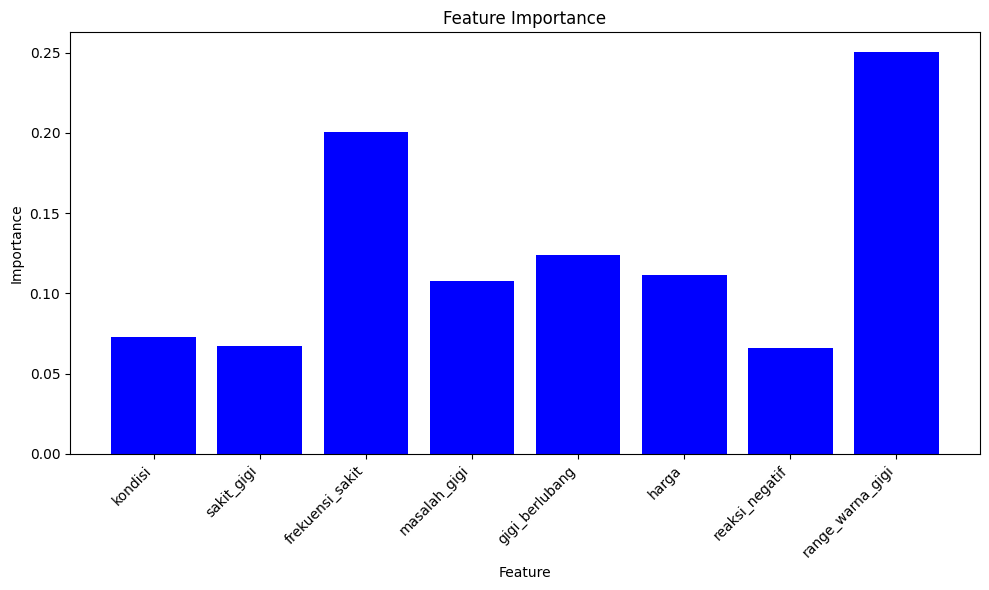

In [ ]:
import matplotlib.pyplot as plt

# Plot bar
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'], color='blue')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Tampilkan plot
plt.show()

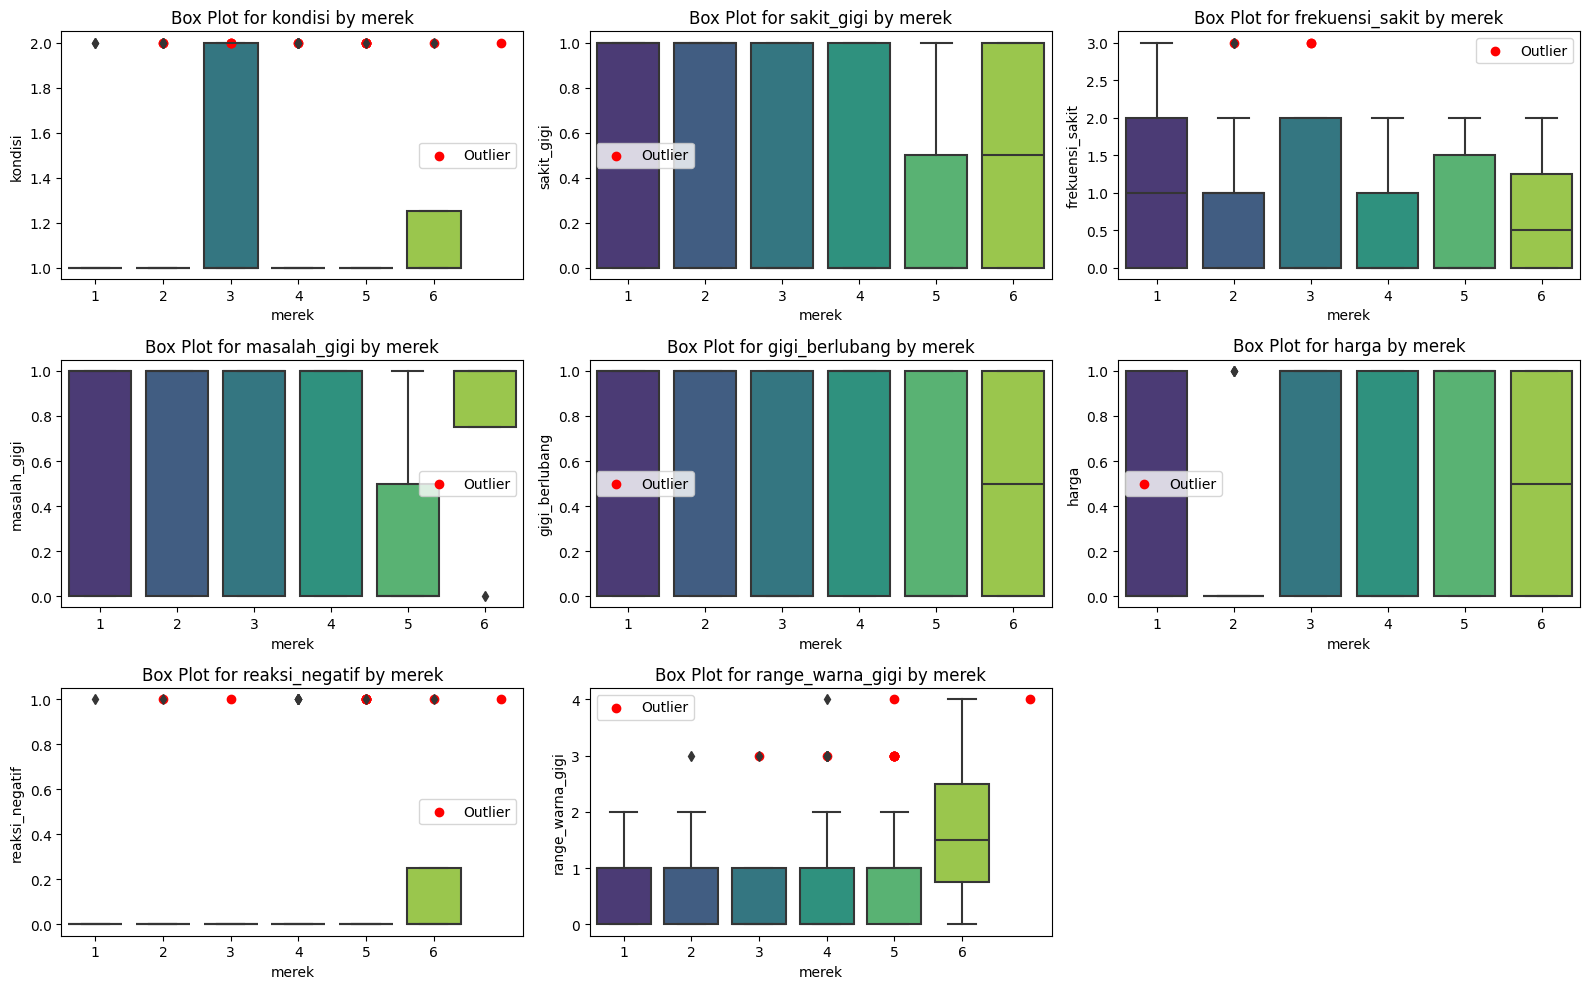

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Kolom yang akan digunakan dalam model
selected_columns = ['kondisi', 'sakit_gigi', 'frekuensi_sakit', 'masalah_gigi', 'gigi_berlubang', 'harga', 'reaksi_negatif', 'range_warna_gigi']

# Menampilkan box plot untuk setiap fitur dengan target variabel merek
plt.figure(figsize=(16, 10))
for i, column in enumerate(selected_columns, 1):
    plt.subplot(3, 3, i)

    # Box plot dengan target variabel merek
    sns.boxplot(x='merek', y=column, data=df, palette='viridis')

    # Deteksi dan penandaan outlier
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    plt.scatter(outliers['merek'], outliers[column], color='red', marker='o', label='Outlier')

    plt.title(f'Box Plot for {column} by merek')
    plt.legend()

plt.tight_layout()
plt.show()


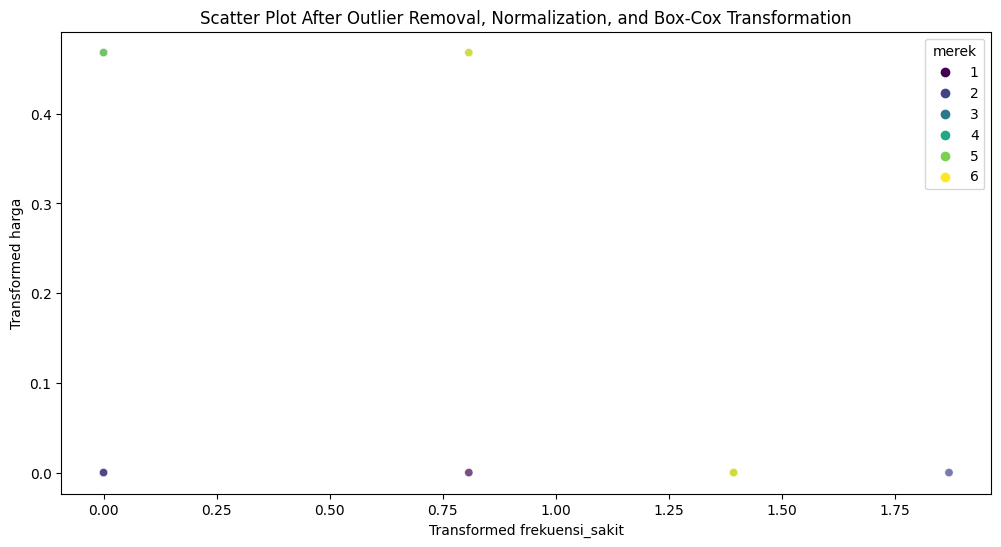

In [ ]:
from sklearn.preprocessing import StandardScaler
from scipy.stats import boxcox

# Identifikasi dan penghapusan outlier menggunakan Z-Score
def identify_and_remove_outliers(data, threshold=3):
    z_scores = np.abs((data - data.mean()) / data.std())
    outliers = (z_scores > threshold).all(axis=1)
    data_no_outliers = data[~outliers]
    return data_no_outliers

# Normalisasi menggunakan Min-Max
def normalize_data(data):
    scaler = StandardScaler()
    normalized_data = scaler.fit_transform(data)
    return normalized_data

# Transformasi Box-Cox
def apply_boxcox_transform(data):
    transformed_data = np.zeros_like(data)
    for i in range(data.shape[1]):
        transformed_data[:, i], _ = boxcox(data[:, i] + 1)  # Menambah 1 untuk menghindari nilai 0
    return transformed_data

# Fitur yang akan digunakan
features = ['frekuensi_sakit', 'harga']

# Identifikasi dan penghapusan outlier
X_train_no_outliers = identify_and_remove_outliers(X_train_undersampled[features])

# Normalisasi data yang telah dihapus outlier
X_train_normalized = normalize_data(X_train_no_outliers)

# Transformasi Box-Cox pada data yang telah dihapus outlier
X_train_boxcox = apply_boxcox_transform(X_train_normalized)

# Scatter plot setelah identifikasi outlier, normalisasi, dan transformasi Box-Cox
plt.figure(figsize=(12, 6))
sns.scatterplot(x=X_train_boxcox[:, 0], y=X_train_boxcox[:, 1], hue=y_train_undersampled[X_train_no_outliers.index], palette='viridis', alpha=0.7)
plt.title('Scatter Plot After Outlier Removal, Normalization, and Box-Cox Transformation')
plt.xlabel('Transformed frekuensi_sakit')
plt.ylabel('Transformed harga')
plt.show()


## EVALUASI

Mengukur akurasi prediksi dan mengidentifikasi apakah model memenuhi syarat untuk diimplementasikan dalam prediksi

In [ ]:
# Pisahkan data menjadi fitur (X) dan label (y)
X = df.drop('merek', axis=1)
y = df['merek']

In [ ]:
# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat model klasifikasi (Random Forest Classifier)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Kolom yang akan digunakan dalam model
selected_columns = ['kondisi', 'sakit_gigi', 'frekuensi_sakit', 'masalah_gigi', 'gigi_berlubang', 'harga', 'reaksi_negatif', 'range_warna_gigi']

In [ ]:
# Melatih model menggunakan subset kolom
model.fit(X_subset, y)
X_subset = X[selected_columns]

In [ ]:
# Lakukan prediksi menggunakan subset kolom
y_pred = model.predict(X_test[selected_columns])

In [ ]:
# Evaluasi akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi Model: {accuracy}')

Akurasi Model: 0.9130434782608695


In [ ]:
# Evaluasi precision, recall, dan f1-score
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

In [ ]:
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')

Precision: 0.9316239316239315
Recall: 0.861111111111111
F1-Score: 0.8822222222222224


In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[ 1  0  0  0  0  0]
 [ 0  2  0  1  0  0]
 [ 0  0  1  0  0  0]
 [ 0  0  0 12  0  0]
 [ 0  0  0  0  4  0]
 [ 0  1  0  0  0  1]]


Baris ke-1, Kolom ke-1 (1): Ini menunjukkan jumlah sampel yang seharusnya masuk ke kelas pertama (true class) dan secara benar diprediksi oleh model sebagai kelas pertama (predicted class).

Baris ke-2, Kolom ke-2 (2): Ini menunjukkan jumlah sampel yang seharusnya masuk ke kelas kedua dan secara benar diprediksi oleh model sebagai kelas kedua.

Baris ke-2, Kolom ke-4 (1): Ini menunjukkan jumlah sampel yang seharusnya masuk ke kelas kedua, tetapi salah diprediksi sebagai kelas keempat.

Baris ke-4, Kolom ke-4 (12): Ini menunjukkan jumlah sampel yang seharusnya masuk ke kelas keempat dan secara benar diprediksi oleh model sebagai kelas keempat.

Baris ke-6, Kolom ke-2 (1): Ini menunjukkan jumlah sampel yang seharusnya masuk ke kelas keenam, tetapi salah diprediksi sebagai kelas kedua.

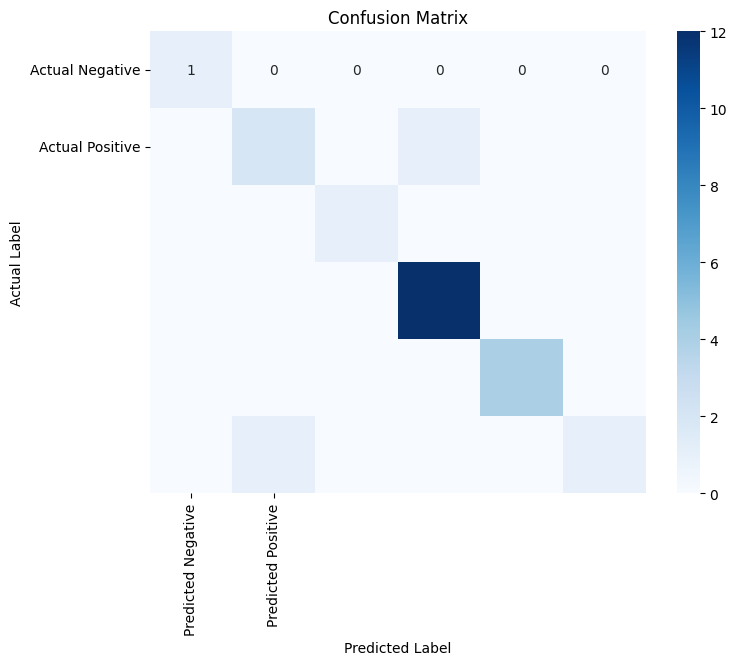

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Membuat heatmap untuk visualisasi
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

In [ ]:
# Classification Report
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00         1
         2.0       0.67      0.67      0.67         3
         3.0       1.00      1.00      1.00         1
         4.0       0.92      1.00      0.96        12
         5.0       1.00      1.00      1.00         4
         6.0       1.00      0.50      0.67         2

    accuracy                           0.91        23
   macro avg       0.93      0.86      0.88        23
weighted avg       0.92      0.91      0.91        23



Alasan menggunakan selected_colomns adalah ketika semua kolom digunakan, maka hasil akurasi hanya menunjukkan 43% dan fitur paling berpengaruh adalah variabel lama yang mana hal tersebut seharusnya bukan merupakan sebab, tapi dampak.

Interpretasi Umum:
Akurasi tinggi (91.3%) menunjukkan sebagian besar prediksi
benar.
Precision yang baik (93.2%) menunjukkan bahwa sebagian besar dari yang diprediksi sebagai positif memang positif.
Recall yang baik (86.1%) menunjukkan bahwa sebagian besar dari yang sebenarnya positif berhasil diprediksi.
F1-Score yang baik (88.2%) menunjukkan keseimbangan antara precision dan recall.

## IMBALANCED DATASET

In [ ]:
activity_count = y.value_counts()
activity_count

merek
4    70
2    18
1     9
5     7
3     5
6     4
Name: count, dtype: Int64

<Axes: ylabel='count'>

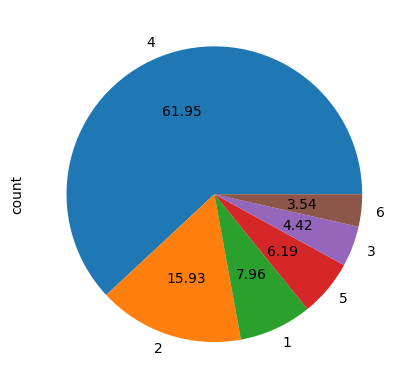

In [ ]:
# Show pie plot (Approach 1)
y.value_counts().plot.pie(autopct='%.2f')

In [ ]:
activity_count.index

Index([4, 2, 1, 5, 3, 6], dtype='Int64', name='merek')

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((90, 12), (90,), (23, 12), (23,))

<Axes: ylabel='count'>

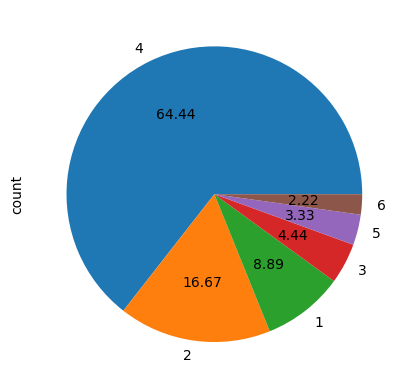

In [ ]:
# Pie chart of the training set
y_train.value_counts().plot.pie(autopct='%.2f')

In [ ]:
y_train.value_counts()

merek
4    58
2    15
1     8
3     4
5     3
6     2
Name: count, dtype: Int64

### Random Undersampling

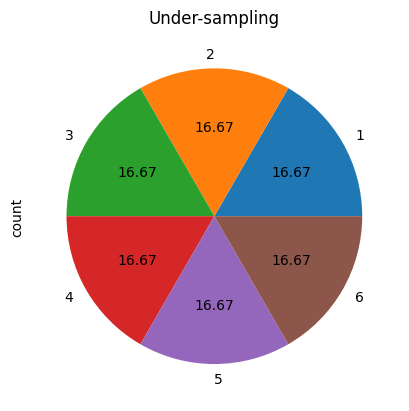

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

class_mapping = {'Ciptadent': 1, 'CloseUp': 2, 'Colgate': 3, 'Lainnya': 6, 'Pepsodent': 4, 'Sensodyne': 5}

# Find the smallest class size
min_class_size = min(y_train.value_counts()[class_mapping.values()])

# Set desired_ratio to the minimum class size
desired_ratio = min_class_size

class_ratios = {class_label: desired_ratio for class_label in class_mapping.values()}

rus = RandomUnderSampler(sampling_strategy=class_ratios)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

ax = y_train_rus.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Under-sampling")


In [ ]:
# Class distribution
y_train_rus.value_counts()

merek
1    2
2    2
3    2
4    2
5    2
6    2
Name: count, dtype: Int64

### Random Oversampling

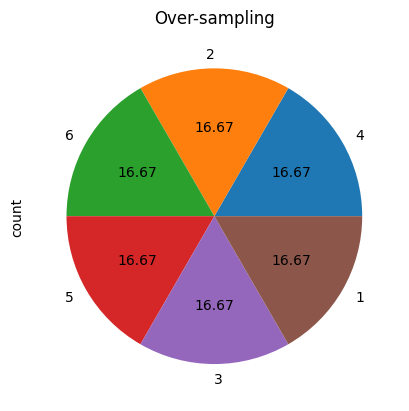

In [ ]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(sampling_strategy=1) # Float
ros = RandomOverSampler(sampling_strategy="not majority") # String
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

ax = y_train_ros.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")

In [ ]:
y_train_ros.value_counts()

merek
4    58
2    58
6    58
5    58
3    58
1    58
Name: count, dtype: Int64

### Model building with/without class balancing

#### 1. Model building with undersampled balanced class

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train_rus, y_train_rus)

RandomForestClassifier(random_state=42)

In [ ]:
# Apply model to make prediction
from sklearn.metrics import matthews_corrcoef

y_test_pred = model.predict(X_test)

mcc_test = matthews_corrcoef(y_test, y_test_pred)

# Display model performance results
df_labels = pd.Series(['MCC_test'], name = 'Performance_metric_names')
df_values = pd.Series([mcc_test], name = 'Performance_metric_values')
df2 = pd.concat([df_labels, df_values], axis=1)
df2

,Performance_metric_names,Performance_metric_values
0,MCC_test,-0.107153


#### 2. Model building with undersampled balanced class

In [ ]:
# Training Random Forest Models
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train_ros, y_train_ros)

RandomForestClassifier(random_state=42)

In [ ]:
# Apply model to make prediction
from sklearn.metrics import matthews_corrcoef

y_test_pred = model.predict(X_test)
mcc_test = matthews_corrcoef(y_test, y_test_pred)

# Display model performance results
df_labels = pd.Series(['MCC_test'], name = 'Performance_metric_names')
df_values = pd.Series([mcc_test], name = 'Performance_metric_values')
df3 = pd.concat([df_labels, df_values], axis=1)
df3

,Performance_metric_names,Performance_metric_values
0,MCC_test,0.007554


#### 3. Simpulan Model building with class balancing

In [ ]:
# Mengecek dengan metode metrik akurasi

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # Ganti dengan model yang Anda gunakan

# Kolom yang akan digunakan dalam model
selected_columns = ['kondisi', 'sakit_gigi', 'frekuensi_sakit', 'masalah_gigi', 'gigi_berlubang', 'harga', 'reaksi_negatif', 'range_warna_gigi']
X_subset = X[selected_columns]

# Menentukan target variabel
target_variable = 'merek'
X = df.drop(target_variable, axis=1)
y = df[target_variable]

# Split data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X_subset, y, test_size=0.2, random_state=42)

# Undersampling
rus = RandomUnderSampler(sampling_strategy='auto')
X_train_undersampled, y_train_undersampled = rus.fit_resample(X_train, y_train)

# Oversampling
ros = RandomOverSampler(sampling_strategy='auto')
X_train_oversampled, y_train_oversampled = ros.fit_resample(X_train, y_train)

# Ganti RandomForestClassifier dengan model Anda
model = RandomForestClassifier(random_state=42)

# Fungsi untuk evaluasi metrik
def evaluate_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    return accuracy, precision, recall, f1

# Evaluasi untuk undersampling
model.fit(X_train_undersampled, y_train_undersampled)
y_pred_undersampled = model.predict(X_test)
accuracy_undersampled, precision_undersampled, recall_undersampled, f1_undersampled = evaluate_metrics(y_test, y_pred_undersampled)

# Evaluasi untuk oversampling
model.fit(X_train_oversampled, y_train_oversampled)
y_pred_oversampled = model.predict(X_test)
accuracy_oversampled, precision_oversampled, recall_oversampled, f1_oversampled = evaluate_metrics(y_test, y_pred_oversampled)

# Tampilkan hasil
print("Metrics for Undersampling:")
print(f"Accuracy: {accuracy_undersampled:.4f}")
print(f"Precision: {precision_undersampled:.4f}")
print(f"Recall: {recall_undersampled:.4f}")
print(f"F1 Score: {f1_undersampled:.4f}")

print("\nMetrics for Oversampling:")
print(f"Accuracy: {accuracy_oversampled:.4f}")
print(f"Precision: {precision_oversampled:.4f}")
print(f"Recall: {recall_oversampled:.4f}")
print(f"F1 Score: {f1_oversampled:.4f}")


Metrics for Undersampling:
Accuracy: 0.1304
Precision: 0.5913
Recall: 0.1304
F1 Score: 0.1576

Metrics for Oversampling:
Accuracy: 0.3478
Precision: 0.3188
Recall: 0.3478
F1 Score: 0.3306


C:\Users\rokeu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Meningkatkan kinerja dengan k-fold

from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier  # Ganti dengan model yang Anda gunakan

# Ganti RandomForestClassifier dengan model Anda
model = RandomForestClassifier(random_state=42)

# Gunakan StratifiedKFold untuk memastikan stratifikasi kelas
undersampling_cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)
undersampling_scores = cross_val_score(model, X_train_undersampled, y_train_undersampled, cv=undersampling_cv, scoring='accuracy')

oversampling_cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)
oversampling_scores = cross_val_score(model, X_train_oversampled, y_train_oversampled, cv=oversampling_cv, scoring='accuracy')

# Tampilkan hasil cross-validation
print("Cross-validation Scores for Undersampling:")
print(undersampling_scores)
print(f"Mean Accuracy: {undersampling_scores.mean():.4f}")

print("\nCross-validation Scores for Oversampling:")
print(oversampling_scores)
print(f"Mean Accuracy: {oversampling_scores.mean():.4f}")


Cross-validation Scores for Undersampling:
[0. 0.]
Mean Accuracy: 0.0000

Cross-validation Scores for Oversampling:
[0.81609195 0.77586207]
Mean Accuracy: 0.7960


Dari nilai Matthews Correlation Coefficient (MCC) yang diperoleh, dapat kita simpulkan bahwa kinerja model pada pengujian menggunakan undersampling cenderung lebih buruk daripada oversampling.

MCC undersampling: -0.107153
MCC oversampling: 0.007554

Dengan demikian, MCC yang negatif pada pengujian undersampling menandakan bahwa model cenderung memiliki performa yang kurang baik dalam mengklasifikasikan data, sedangkan MCC yang mendekati nol pada oversampling menunjukkan performa yang tidak jauh berbeda dari kebetulan acak.

Kemudian dari metode evaluasi metrik, terlihat bahwa kinerja model pada data undersampling dan oversampling masih memiliki ruang untuk peningkatan. Kami menggunakan Cross-Validation untuk mendapatkan estimasi performa model yang lebih konsisten. Namun demikian, hasil menunjukkan bahwa ketika menggunakan undersampling, model tidak dapat menghasilkan prediksi yang akurat, sehingga menghasilkan akurasi 0.0000. Sementara itu, ketika menggunakan oversampling, model memiliki akurasi yang lebih tinggi, dengan nilai rata-rata akurasi sekitar 0.7960.

Interpretasi

Undersamplin

Dengan undersampling, model tampaknya mengalami kesulitan dalam membuat prediksi yang akurat, dan hasilnya mungkin tidak dapat diandalkan. Ini bisa disebabkan oleh kurangnya sampel yang cukup untuk melatih model secara memad
ai.
Oversamp ng:

Dengan oversampling, model memiliki kinerja yang lebih baik, dengan akurasi rata-rata sekitar 0.7960. Ini menunjukkan bahwa oversampling mungkin telah membantu model untuk memiliki performa yang lebih baik dalam mengklasifikasikan data.

Tim kami memutuskan untuk tidak melakukan penyesuaian class balancing dikarenakan terdapat gap yang cukup jauh pada count of value data target yang berjenis dataset multiclass. Selain itu, upaya peningkatan kinerja model melalui k-fold tidak memberikan hasil yang signifikan disebabkan oleh penentuan nilai k-fold yang kurang memadai sehingga hasil menjadi tidak kredibel. Namun demikian, pada evaluasi metriks awal telah menunjukkan hasil akurasi tinggi (91.3%), sehingga model awal dapat dijadikan model untuk melakukan PREDIKSI MEREK PASTA GIGI BERDASARKAN ANALISA KONDISI GIGI DAN PREFERENSI HARGA.

# IMPLEMENTASI PREDIKSI

In [ ]:
import pandas as pd
#Menggunakan data pada baris pertama dataset.csv
#M. Jadid Taqwa

# Contoh prediksi untuk data baru
new_data = pd.DataFrame({
    'kondisi': [1],
    'sakit_gigi': [1],
    'frekuensi_sakit': [0],
    'masalah_gigi': [0],
    'gigi_berlubang': [1],
    'harga': [1],
    'reaksi_negatif': [0],
    'range_warna_gigi': [0]
})

# Lakukan prediksi untuk data baru
prediction = model.predict(new_data)

# Membuat mapping dictionary
brand_mapping = {
    1: 'Ciptadent',
    2: 'CloseUp',
    3: 'Colgate',
    4: 'Pepsodent',
    5: 'Sensodyne',
    6: 'Lainnya'
}

# Mapping hasil prediksi ke nama merek
predicted_brand = brand_mapping.get(prediction[0], 'Tidak Diketahui')
print(f'Prediksi Merek Pasta Gigi: {predicted_brand}')

Prediksi Merek Pasta Gigi: Colgate


In [ ]:
import pandas as pd

# Contoh prediksi untuk data baru
new_data = pd.DataFrame({
    'kondisi': [1],
    'sakit_gigi': [1],
    'frekuensi_sakit': [1],
    'masalah_gigi': [1],
    'gigi_berlubang': [1],
    'harga': [1],
    'reaksi_negatif': [0],
    'range_warna_gigi': [3]  # Adjusted to match the bin ranges
})

# Lakukan prediksi untuk data baru
prediction = model.predict(new_data)

# Membuat mapping dictionary
brand_mapping = {
    1: 'Ciptadent',
    2: 'CloseUp',
    3: 'Colgate',
    4: 'Pepsodent',
    5: 'Sensodyne',
    6: 'Lainnya'
}

# Mapping hasil prediksi ke nama merek
predicted_brand = brand_mapping.get(prediction[0], 'Tidak Diketahui')
print(f'Prediksi Merek Pasta Gigi: {predicted_brand}')

Prediksi Merek Pasta Gigi: Pepsodent


In [ ]:
import tkinter as tk
from tkinter import ttk
import pandas as pd

# Fungsi untuk melakukan prediksi
def predict_brand():
    # Mendapatkan nilai dari input pengguna
    kondisi_val = kondisi_var.get()
    sakit_gigi_val = sakit_gigi_var.get()
    frekuensi_sakit_val = frekuensi_sakit_var.get()
    masalah_gigi_val = masalah_gigi_var.get()
    gigi_berlubang_val = gigi_berlubang_var.get()
    harga_val = harga_var.get()
    reaksi_negatif_val = reaksi_negatif_var.get()
    range_warna_gigi_val = range_warna_gigi_var.get()

    # Mapping nilai dropdown ke backend values
    kondisi_mapping = {'Normal': 1, 'Sensitif': 2}
    sakit_gigi_mapping = {'Iyaa': 1, 'Tidak Pernah': 0}
    frekuensi_sakit_mapping = {'Tidak pernah': 0, 'Jarang': 1, 'kadang-kadang': 2, 'Sering': 3}
    masalah_gigi_mapping = {'Pernah': 1, 'Tidak Pernah': 0}
    gigi_berlubang_mapping = {'Ya': 1, 'Tidak': 0}
    harga_mapping = {'Ya': 1, 'Tidak': 0}
    reaksi_negatif_mapping = {'Pernah': 1, 'Tidak Pernah': 0}

    # Menggunakan kategori untuk range_warna_gigi
    if range_warna_gigi_val <= 5:
        range_warna_gigi_val = 0
    elif 6 <= range_warna_gigi_val <= 10:
        range_warna_gigi_val = 1
    elif 11 <= range_warna_gigi_val <= 15:
        range_warna_gigi_val = 2
    elif 16 <= range_warna_gigi_val <= 20:
        range_warna_gigi_val = 3
    else:
        range_warna_gigi_val = 4

    # Membuat DataFrame dari input pengguna
    new_data = pd.DataFrame({
        'kondisi': [kondisi_mapping.get(kondisi_val, 0)],
        'sakit_gigi': [sakit_gigi_mapping.get(sakit_gigi_val, 0)],
        'frekuensi_sakit': [frekuensi_sakit_mapping.get(frekuensi_sakit_val, 0)],
        'masalah_gigi': [masalah_gigi_mapping.get(masalah_gigi_val, 0)],
        'gigi_berlubang': [gigi_berlubang_mapping.get(gigi_berlubang_val, 0)],
        'harga': [harga_mapping.get(harga_val, 0)],
        'reaksi_negatif': [reaksi_negatif_mapping.get(reaksi_negatif_val, 0)],
        'range_warna_gigi': [range_warna_gigi_val]
    })

    # Lakukan prediksi untuk data baru
    prediction = model.predict(new_data)

    # Mapping hasil prediksi ke nama merek
    predicted_brand = brand_mapping.get(prediction[0], 'Tidak Diketahui')

    # Menampilkan hasil prediksi pada label
    result_label.config(text=f'Prediksi Merek Pasta Gigi: {predicted_brand}')

# Membuat jendela aplikasi
app = tk.Tk()
app.title("Aplikasi Prediksi Merek Pasta Gigi")

# Membuat label dan dropdown untuk setiap fitur
labels = ['Kondisi', 'Sakit Gigi', 'Frekuensi Sakit', 'Masalah Gigi',
          'Gigi Berlubang', 'Harga', 'Reaksi Negatif', 'Range Warna Gigi']

# Dropdown options
kondisi_options = ['Normal', 'Sensitif']
sakit_gigi_options = ['Iya', 'Tidak Pernah']
frekuensi_sakit_options = ['Tidak pernah', 'Jarang', 'kadang-kadang', 'Sering']
masalah_gigi_options = ['Pernah', 'Tidak Pernah']
gigi_berlubang_options = ['Ya', 'Tidak']
harga_options = ['Ya', 'Tidak']
reaksi_negatif_options = ['Pernah', 'Tidak Pernah']

# Variable untuk menyimpan nilai dropdown
kondisi_var = tk.StringVar(app)
sakit_gigi_var = tk.StringVar(app)
frekuensi_sakit_var = tk.StringVar(app)
masalah_gigi_var = tk.StringVar(app)
gigi_berlubang_var = tk.StringVar(app)
harga_var = tk.StringVar(app)
reaksi_negatif_var = tk.StringVar(app)
range_warna_gigi_var = tk.IntVar(app)

# Setting default value untuk dropdown
kondisi_var.set(kondisi_options[0])
sakit_gigi_var.set(sakit_gigi_options[0])
frekuensi_sakit_var.set(frekuensi_sakit_options[0])
masalah_gigi_var.set(masalah_gigi_options[0])
gigi_berlubang_var.set(gigi_berlubang_options[0])
harga_var.set(harga_options[0])
reaksi_negatif_var.set(reaksi_negatif_options[0])
range_warna_gigi_var.set(1)

for i, label in enumerate(labels):
    ttk.Label(app, text=label).grid(row=i, column=0, padx=10, pady=5, sticky='w')
    if label == 'Kondisi':
        ttk.Combobox(app, values=kondisi_options, textvariable=kondisi_var).grid(row=i, column=1, padx=10, pady=5)
    elif label == 'Sakit Gigi':
        ttk.Combobox(app, values=sakit_gigi_options, textvariable=sakit_gigi_var).grid(row=i, column=1, padx=10, pady=5)
    elif label == 'Frekuensi Sakit':
        ttk.Combobox(app, values=frekuensi_sakit_options, textvariable=frekuensi_sakit_var).grid(row=i, column=1, padx=10, pady=5)
    elif label == 'Masalah Gigi':
        ttk.Combobox(app, values=masalah_gigi_options, textvariable=masalah_gigi_var).grid(row=i, column=1, padx=10, pady=5)
    elif label == 'Gigi Berlubang':
        ttk.Combobox(app, values=gigi_berlubang_options, textvariable=gigi_berlubang_var).grid(row=i, column=1, padx=10, pady=5)
    elif label == 'Harga':
        ttk.Combobox(app, values=harga_options, textvariable=harga_var).grid(row=i, column=1, padx=10, pady=5)
    elif label == 'Reaksi Negatif':
        ttk.Combobox(app, values=reaksi_negatif_options, textvariable=reaksi_negatif_var).grid(row=i, column=1, padx=10, pady=5)
    elif label == 'Range Warna Gigi':
        tk.Entry(app, textvariable=range_warna_gigi_var).grid(row=i, column=1, padx=10, pady=5)

# Tombol untuk melakukan prediksi
ttk.Button(app, text="Prediksi", command=predict_brand).grid(row=len(labels), column=0, columnspan=2, pady=10)

# Label untuk menampilkan hasil prediksi
result_label = ttk.Label(app, text="")
result_label.grid(row=len(labels) + 1, column=0, columnspan=2, pady=10)

# Menjalankan aplikasi
app.mainloop()

In [ ]:
import tkinter as tk
from tkinter import ttk
import pandas as pd

# Fungsi untuk melakukan prediksi
def predict_brand():
    # Mendapatkan nilai dari input pengguna
    kondisi_val = kondisi_var.get()
    sakit_gigi_val = sakit_gigi_var.get()
    frekuensi_sakit_val = frekuensi_sakit_var.get()
    masalah_gigi_val = masalah_gigi_var.get()
    gigi_berlubang_val = gigi_berlubang_var.get()
    harga_val = harga_var.get()
    reaksi_negatif_val = reaksi_negatif_var.get()
    range_warna_gigi_val = range_warna_gigi_var.get()

    # Mapping nilai dropdown ke backend values
    kondisi_mapping = {'Normal': 1, 'Sensitif': 2}
    sakit_gigi_mapping = {'Iya': 1, 'Tidak Pernah': 0}
    frekuensi_sakit_mapping = {'Tidak pernah': 0, 'Jarang': 1, 'kadang-kadang': 2, 'Sering': 3}
    masalah_gigi_mapping = {'Pernah': 1, 'Tidak Pernah': 0}
    gigi_berlubang_mapping = {'Ya': 1, 'Tidak': 0}
    harga_mapping = {'Ya': 1, 'Tidak': 0}
    reaksi_negatif_mapping = {'Pernah': 1, 'Tidak Pernah': 0}

    # Menggunakan kategori untuk range_warna_gigi
    if range_warna_gigi_val <= 5:
        range_warna_gigi_val = 0
    elif 6 <= range_warna_gigi_val <= 10:
        range_warna_gigi_val = 1
    elif 11 <= range_warna_gigi_val <= 15:
        range_warna_gigi_val = 2
    elif 16 <= range_warna_gigi_val <= 20:
        range_warna_gigi_val = 3
    else:
        range_warna_gigi_val = 4

    # Membuat DataFrame dari input pengguna
    new_data = pd.DataFrame({
        'kondisi': [kondisi_mapping.get(kondisi_val, 0)],
        'sakit_gigi': [sakit_gigi_mapping.get(sakit_gigi_val, 0)],
        'frekuensi_sakit': [frekuensi_sakit_mapping.get(frekuensi_sakit_val, 0)],
        'masalah_gigi': [masalah_gigi_mapping.get(masalah_gigi_val, 0)],
        'gigi_berlubang': [gigi_berlubang_mapping.get(gigi_berlubang_val, 0)],
        'harga': [harga_mapping.get(harga_val, 0)],
        'reaksi_negatif': [reaksi_negatif_mapping.get(reaksi_negatif_val, 0)],
        'range_warna_gigi': [range_warna_gigi_val]
    })

    # Lakukan prediksi untuk data baru
    prediction = model.predict(new_data)

    # Mapping hasil prediksi ke nama merek
    predicted_brand = brand_mapping.get(prediction[0], 'Tidak Diketahui')

    # Menampilkan hasil prediksi pada label
    result_label.config(text=f'Prediksi Merek Pasta Gigi: {predicted_brand}')

# Membuat jendela aplikasi
app = tk.Tk()
app.title("Aplikasi Prediksi Merek Pasta Gigi")

# Membuat label dan dropdown untuk setiap fitur
labels = ['Kondisi', 'Sakit Gigi', 'Frekuensi Sakit', 'Masalah Gigi',
          'Gigi Berlubang', 'Harga', 'Reaksi Negatif', 'Range Warna Gigi']

# Pertanyaan untuk setiap label
questions = {
    'Kondisi': 'Kondisi gigi anda saat ini?',
    'Sakit Gigi': 'Apakah anda mempunyai riwayat sakit gigi?',
    'Frekuensi Sakit': 'Jika jawaban di atas adalah iya, seberapa sering Anda mengalami sakit gigi?',
    'Masalah Gigi': 'Pernah mengalami masalah gigi lainnya? (misalnya, gusi berdarah, gigi tanggal, dll.)',
    'Gigi Berlubang': 'Apakah anda memiliki gigi yang berlubang?',
    'Harga': 'Apakah harga mempengaruhi pilihan Anda dalam membeli pasta gigi?',
    'Reaksi Negatif': 'Apakah Anda pernah mengalami reaksi negatif setelah menggunakan pasta gigi tertentu? (misalnya, iritasi gusi, rasa panas, dll.)',
    'Range Warna Gigi': 'Range warna gigi anda saat ini \n <=5 = 0, 6-10 = 1, 11-15 = 2, 16-20 = 3, >20 = 4'
}

# Dropdown options
kondisi_options = ['Normal', 'Sensitif']
sakit_gigi_options = ['Iya', 'Tidak Pernah']
frekuensi_sakit_options = ['Tidak pernah', 'Jarang', 'kadang-kadang', 'Sering']
masalah_gigi_options = ['Pernah', 'Tidak Pernah']
gigi_berlubang_options = ['Ya', 'Tidak']
harga_options = ['Ya', 'Tidak']
reaksi_negatif_options = ['Pernah', 'Tidak Pernah']

# Variable untuk menyimpan nilai dropdown
kondisi_var = tk.StringVar(app)
sakit_gigi_var = tk.StringVar(app)
frekuensi_sakit_var = tk.StringVar(app)
masalah_gigi_var = tk.StringVar(app)
gigi_berlubang_var = tk.StringVar(app)
harga_var = tk.StringVar(app)
reaksi_negatif_var = tk.StringVar(app)
range_warna_gigi_var = tk.IntVar(app)

# Setting default value untuk dropdown
kondisi_var.set(kondisi_options[0])
sakit_gigi_var.set(sakit_gigi_options[0])
frekuensi_sakit_var.set(frekuensi_sakit_options[0])
masalah_gigi_var.set(masalah_gigi_options[0])
gigi_berlubang_var.set(gigi_berlubang_options[0])
harga_var.set(harga_options[0])
reaksi_negatif_var.set(reaksi_negatif_options[0])
range_warna_gigi_var.set(1)

for i, label in enumerate(labels):
    ttk.Label(app, text=questions[label]).grid(row=i, column=0, padx=10, pady=5, sticky='w')
    if label == 'Kondisi':
        ttk.Combobox(app, values=kondisi_options, textvariable=kondisi_var).grid(row=i, column=1, padx=10, pady=5)
    elif label == 'Sakit Gigi':
        ttk.Combobox(app, values=sakit_gigi_options, textvariable=sakit_gigi_var).grid(row=i, column=1, padx=10, pady=5)
    elif label == 'Frekuensi Sakit':
        ttk.Combobox(app, values=frekuensi_sakit_options, textvariable=frekuensi_sakit_var).grid(row=i, column=1, padx=10, pady=5)
    elif label == 'Masalah Gigi':
        ttk.Combobox(app, values=masalah_gigi_options, textvariable=masalah_gigi_var).grid(row=i, column=1, padx=10, pady=5)
    elif label == 'Gigi Berlubang':
        ttk.Combobox(app, values=gigi_berlubang_options, textvariable=gigi_berlubang_var).grid(row=i, column=1, padx=10, pady=5)
    elif label == 'Harga':
        ttk.Combobox(app, values=harga_options, textvariable=harga_var).grid(row=i, column=1, padx=10, pady=5)
    elif label == 'Reaksi Negatif':
        ttk.Combobox(app, values=reaksi_negatif_options, textvariable=reaksi_negatif_var).grid(row=i, column=1, padx=10, pady=5)
    elif label == 'Range Warna Gigi':
        tk.Entry(app, textvariable=range_warna_gigi_var).grid(row=i, column=1, padx=10, pady=5)

# Tombol untuk melakukan prediksi
ttk.Button(app, text="Prediksi", command=predict_brand).grid(row=len(labels), column=0, columnspan=2, pady=10)

# Label untuk menampilkan hasil prediksi
result_label = ttk.Label(app, text="")
result_label.grid(row=len(labels) + 1, column=0, columnspan=2, pady=10)

# Menjalankan aplikasi
app.mainloop()
